In [1]:
# Data Analysis
# Reading from file,PCA
# Imports section
import sys
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import Orange
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
# Read the file in the format given
text=""
nLines=0
nAttributes=0
nClasses=0
attributesName = []
data = []
dataPerAttribute = []
classes = []
try:
    with open("archivo.txt","r") as file:
        count=0
        for line in file:
            if count < 3:
                if count == 0:
                    nLines = int(line.strip())
                else:
                    if count == 1:
                        nAttributes = int(line.strip())
                        for i in range(1,nAttributes+1):
                            attributesName.append("att"+str(i))
                            dataPerAttribute.append([])
                    else:
                        if count == 2:
                            nClasses = int(line.strip())
            else:
                split_string_S = line.strip().split(',')
                
                count_split = 0
                split_string_n = []
                for split in split_string_S:
                    if count_split >= nAttributes:
                        split_string_n.append(int(split))
                    else:
                        split_string_n.append(float(split))
                    count_split += 1
                    
                data.append(split_string_n)
                classes.append(split_string_n[nAttributes])
                n_attribute = 0
                for attribute in split_string_n:
                    if n_attribute >= nAttributes:
                        break
                    else:
                        dataPerAttribute[n_attribute].append(attribute)
                        n_attribute += 1
            count += 1
        print("EOF reached")
except FileNotFoundError:
    text="Archivo no existe"
    exit()
finally:
    file.close()
    # print(str(nLines) + "\n")
    # print(str(nAttributes) + "\n")
    # print(str(nClasses) + "\n")
    # print(attributesName)
    # print(data)

EOF reached


In [3]:
# Turning the data into a DataFrame python object

columns_ = attributesName[:]
columns_.append("target")

dataFrame = pd.DataFrame(data=data, columns=columns_)
dataFrame


,att1,att2,att3,att4,att5,att6,att7,att8,att9,att10,att11,att12,att13,att14,att15,att16,att17,att18,att19,target
0,140.0,125.0,0.0,0.0,0.000000,0.277778,0.062963,0.666667,0.311111,6.185185,7.333334,7.666666,3.555556,3.444444,4.444445,-7.888889,7.777778,0.545635,-1.121818,0
1,188.0,133.0,0.0,0.0,0.000000,0.333333,0.266667,0.500000,0.077778,6.666666,8.333334,7.777778,3.888889,5.000000,3.333333,-8.333333,8.444445,0.538580,-0.924817,0
2,105.0,139.0,0.0,0.0,0.000000,0.277778,0.107407,0.833333,0.522222,6.111111,7.555555,7.222222,3.555556,4.333334,3.333333,-7.666666,7.555555,0.532628,-0.965946,0
3,34.0,137.0,0.0,0.0,0.000000,0.500000,0.166667,1.111111,0.474074,5.851852,7.777778,6.444445,3.333333,5.777778,1.777778,-7.555555,7.777778,0.573633,-0.744272,0
4,39.0,111.0,0.0,0.0,0.000000,0.722222,0.374074,0.888889,0.429629,6.037037,7.000000,7.666666,3.444444,2.888889,4.888889,-7.777778,7.888889,0.562919,-1.175773,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,225.0,58.0,0.0,0.0,0.000000,0.333334,0.421637,0.444445,0.344265,8.333333,5.555555,14.111111,5.333334,-8.333333,17.333334,-9.000000,14.111111,0.622222,-2.068564,6
416,170.0,154.0,0.0,0.0,0.000000,0.111111,0.172133,0.055556,0.136083,0.074074,0.000000,0.222222,0.000000,-0.222222,0.444444,-0.222222,0.222222,0.222222,-2.094395,6
417,238.0,61.0,0.0,0.0,0.000000,0.666667,0.471405,0.722222,0.490653,8.777778,5.888889,14.333333,6.111111,-8.666667,16.666666,-8.000000,14.333333,0.588823,-2.121837,6
418,189.0,62.0,0.0,0.0,0.000000,0.388889,0.250924,0.444444,0.344265,7.629630,5.000000,13.111111,4.777778,-7.888889,16.444445,-8.555555,13.111111,0.635938,-2.066953,6


In [4]:
# Separating out the features
x = dataFrame.loc[:, attributesName].values
# Separating out the target
y = dataFrame.loc[:,['target']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [5]:
# Creating the PCA components
pca = PCA(n_components=nAttributes)
principalComponents = pca.fit_transform(x)
pc_names = []
for i in range(1,nAttributes+1):
    pc_names.append("principal component "+ str(i))

principalDf = pd.DataFrame(data = principalComponents
             , columns = pc_names)
principalDf 

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10,principal component 11,principal component 12,principal component 13,principal component 14,principal component 15,principal component 16,principal component 17,principal component 18,principal component 19
0,-2.299677,-0.343837,-1.036211,-0.321205,-0.060937,-0.057857,-0.203537,0.267093,-0.334486,0.113023,0.666430,-0.362457,0.046150,0.016906,6.144416e-09,1.372287e-08,9.905469e-09,2.564588e-09,-1.388491e-17
1,-2.371925,-0.403867,-1.035717,0.123448,0.295759,-0.181934,0.080185,0.200005,-0.314107,0.101003,0.889973,-0.491128,0.068515,0.008059,1.844413e-08,2.389622e-08,1.910402e-09,6.990624e-09,-6.171878e-18
2,-2.389590,-0.266572,-0.770185,-0.495633,-0.251245,0.063266,-0.559136,0.238570,-0.461914,0.103512,0.698174,-0.361492,0.047970,0.017430,8.025220e-09,1.026799e-08,1.122305e-09,-1.569127e-08,3.365836e-16
3,-2.514506,-0.096834,-0.574882,-1.135091,-0.784593,0.285231,-1.009104,0.241223,-0.490806,0.077347,0.763879,-0.476759,0.044154,0.000772,6.886962e-09,2.294762e-08,-5.675937e-09,-1.332851e-08,-6.262596e-18
4,-2.236746,-0.124341,-0.914775,-1.225178,-0.787284,0.239401,-0.870827,0.379662,-0.257430,-0.002796,0.487675,-0.330406,0.010776,0.012197,5.543655e-09,1.754366e-08,3.398914e-09,-1.143453e-09,-5.023669e-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,-1.307175,-0.558173,-2.131070,-0.175959,0.190861,-0.433279,1.093097,0.207017,0.119553,0.118490,-0.256853,-0.147043,-0.004129,-0.011445,3.067477e-08,-3.569598e-08,5.833697e-09,-5.827932e-09,7.256469e-20
416,-2.480510,-0.440099,-0.668901,0.515578,0.769818,-0.010862,-0.690503,0.771565,-0.197321,-0.024439,0.080770,0.864027,-0.025577,-0.010964,1.651282e-08,6.045816e-09,-2.033273e-09,-5.670230e-09,1.587645e-18
417,-1.262135,-0.478888,-2.066865,-0.002415,0.337953,-0.427636,1.113872,0.188592,0.262844,0.119640,-0.252318,-0.044118,-0.011798,-0.011576,-3.821667e-08,9.127949e-09,5.345744e-09,2.088874e-08,8.856890e-19
418,-1.403244,-0.494110,-2.024198,-0.459423,-0.073273,-0.330329,0.834267,0.192290,0.054330,0.083206,-0.252261,-0.104237,-0.018595,-0.008993,3.756811e-08,-1.363236e-08,-1.299784e-09,-3.176698e-09,-2.593804e-19


In [9]:
#joining the data with the targets
finalDf = pd.concat([principalDf, dataFrame[['target']]], axis = 1)
finalDf

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10,principal component 11,principal component 12,principal component 13,principal component 14,principal component 15,principal component 16,principal component 17,principal component 18,principal component 19,target
0,-2.299677,-0.343837,-1.036211,-0.321205,-0.060937,-0.057857,-0.203537,0.267093,-0.334486,0.113023,0.666430,-0.362457,0.046150,0.016906,6.144416e-09,1.372287e-08,9.905469e-09,2.564588e-09,-1.388491e-17,0
1,-2.371925,-0.403867,-1.035717,0.123448,0.295759,-0.181934,0.080185,0.200005,-0.314107,0.101003,0.889973,-0.491128,0.068515,0.008059,1.844413e-08,2.389622e-08,1.910402e-09,6.990624e-09,-6.171878e-18,0
2,-2.389590,-0.266572,-0.770185,-0.495633,-0.251245,0.063266,-0.559136,0.238570,-0.461914,0.103512,0.698174,-0.361492,0.047970,0.017430,8.025220e-09,1.026799e-08,1.122305e-09,-1.569127e-08,3.365836e-16,0
3,-2.514506,-0.096834,-0.574882,-1.135091,-0.784593,0.285231,-1.009104,0.241223,-0.490806,0.077347,0.763879,-0.476759,0.044154,0.000772,6.886962e-09,2.294762e-08,-5.675937e-09,-1.332851e-08,-6.262596e-18,0
4,-2.236746,-0.124341,-0.914775,-1.225178,-0.787284,0.239401,-0.870827,0.379662,-0.257430,-0.002796,0.487675,-0.330406,0.010776,0.012197,5.543655e-09,1.754366e-08,3.398914e-09,-1.143453e-09,-5.023669e-18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,-1.307175,-0.558173,-2.131070,-0.175959,0.190861,-0.433279,1.093097,0.207017,0.119553,0.118490,-0.256853,-0.147043,-0.004129,-0.011445,3.067477e-08,-3.569598e-08,5.833697e-09,-5.827932e-09,7.256469e-20,6
416,-2.480510,-0.440099,-0.668901,0.515578,0.769818,-0.010862,-0.690503,0.771565,-0.197321,-0.024439,0.080770,0.864027,-0.025577,-0.010964,1.651282e-08,6.045816e-09,-2.033273e-09,-5.670230e-09,1.587645e-18,6
417,-1.262135,-0.478888,-2.066865,-0.002415,0.337953,-0.427636,1.113872,0.188592,0.262844,0.119640,-0.252318,-0.044118,-0.011798,-0.011576,-3.821667e-08,9.127949e-09,5.345744e-09,2.088874e-08,8.856890e-19,6
418,-1.403244,-0.494110,-2.024198,-0.459423,-0.073273,-0.330329,0.834267,0.192290,0.054330,0.083206,-0.252261,-0.104237,-0.018595,-0.008993,3.756811e-08,-1.363236e-08,-1.299784e-09,-3.176698e-09,-2.593804e-19,6


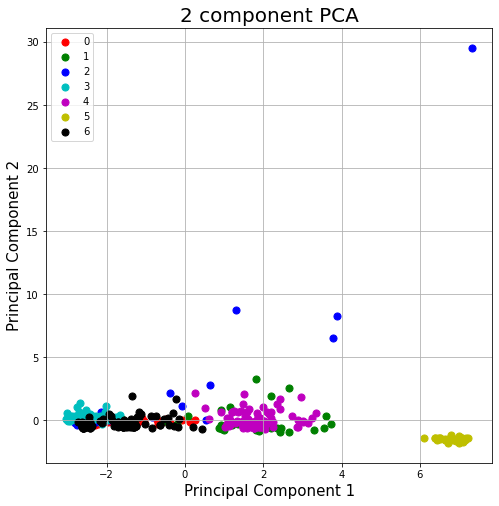

In [10]:
# PLotting the data into a 2 dimensional data.
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = range(0,7)
colors = ['r', 'g', 'b','c','m','y','k']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()